In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [2]:
df_main = pd.read_csv(r'results_svm/results_svm_main.csv', index_col='index')
df_fabula = pd.read_csv(r'results_svm/results_svm_fabula.csv', index_col='index')

In [3]:
def indextodate(df):
    list_date = []
    for index in df.index:
        list_date.append(index.split('_')[0])
    return list_date

In [4]:
list_date = indextodate(df_main)    

In [5]:
df_main['date']=list_date

In [6]:
df_main.sort_values(by=['date'], inplace=True)

In [7]:
df_main['prediction'].value_counts()

non_canon    83
canon        45
Name: prediction, dtype: int64

In [8]:
def visualisation(df_main):
    df_canon = df_main[df_main['metadata'] == 'canon']
    df_non_canon =  df_main[df_main['metadata'] == 'non_canon']
    
    annee_canon = np.array(list(df_canon['date'])).reshape(-1, 1)
    annee_canon = annee_canon.astype('int32')
    data_canon = list(df_canon['proba canon'])

    annee_non_canon = np.array(list(df_non_canon['date'])).reshape(-1, 1)
    annee_non_canon = annee_non_canon.astype('int32')
    data_non_canon = list(df_non_canon['proba canon'])

    
    plt.figure(figsize=(25,10))
    plt.scatter(annee_non_canon, data_non_canon, marker='^', label = 'non_canon', color='blue')
    plt.scatter(annee_canon, data_canon, marker='o', label = 'canon', color = 'red')
    
    plt.plot(annee_canon, svr_poly.fit(annee_canon, data_canon).predict(annee_canon),color = 'red')
    plt.plot(annee_non_canon, svr_poly.fit(annee_non_canon, data_non_canon).predict(annee_non_canon),color= 'blue')

    
    plt.ylabel("Probabilité prédite d'appartenir au canon littéraire", fontsize=20)
    plt.xlabel("date", fontsize=10)
    plt.xticks(rotation=60)

    plt.title("Modellisation du prestige littéraire", fontsize=40)
    plt.legend(prop={'size': 20})

    plt.show()

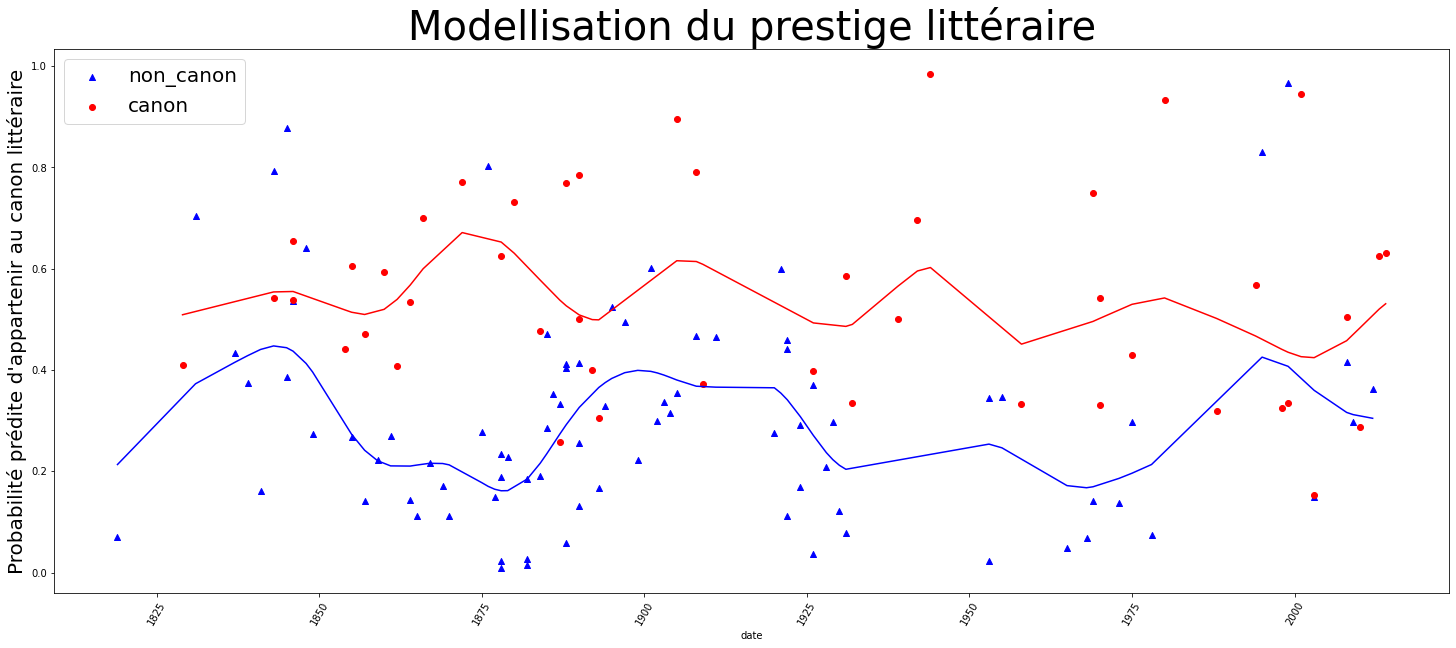

In [36]:
visualisation(df_main)

In [40]:
list_date_fabula = indextodate(df_fabula)

In [41]:
df_fabula['date']=list_date_fabula

In [42]:
df_fabula.sort_values(by=['date'], inplace=True)

In [43]:
df_fabula

,metadata,proba non-canon,proba canon,prediction,accord,date
index,,,,,,
1815_Gay-Sophie_Anatole_Vol-2,False,0.997322,0.002678,False,True,1815
1816_Bournon-Malarme-Charlotte-de_Lancelot-Montagu-ou-le-Resultat-des-bonnes-fortunes_Tome-1,False,0.997786,0.002214,False,True,1816
1827_Vigny-Alfred-de_Cinq-Mars,True,0.967936,0.032064,False,False,1827
1831_Signol-Alphonse-Macaire-Stanislas_Le-Chiffonnier_Tome-4,False,0.996499,0.003501,False,True,1831
1832_Karr-Alphonse_Sous-les-tilleuls,False,0.801398,0.198602,False,True,1832
...,...,...,...,...,...,...
2015_Germain-Sylvie_a-la-table-des-hommes,True,0.137837,0.862163,True,True,2015
2015_Sansal-Boualem_2084-La-fin-du-monde,False,0.758357,0.241643,False,True,2015
2016_Cusset-Catherine_L-autre-qu-on-adorait,False,0.298056,0.701944,True,False,2016


In [45]:
def visualisation(df_fabula):
    df_canon = df_fabula[df_fabula['metadata'] == True]
    df_non_canon =  df_fabula[df_fabula['metadata'] == False]

    
    annee_canon = np.array(list(df_canon['date'])).reshape(-1, 1)
    annee_canon = annee_canon.astype('int32')
    data_canon = list(df_canon['proba canon'])

    annee_non_canon = np.array(list(df_non_canon['date'])).reshape(-1, 1)
    annee_non_canon = annee_non_canon.astype('int32')
    data_non_canon = list(df_non_canon['proba canon'])

    
    plt.figure(figsize=(25,10))
    plt.scatter(annee_non_canon, data_non_canon, marker='^', label = 'non_canon', color='blue')
    plt.scatter(annee_canon, data_canon, marker='o', label = 'canon', color = 'red')
    
    
    plt.ylabel("Probabilité prédite d'appartenir au canon littéraire", fontsize=20)
    plt.xlabel("date", fontsize=10)
    plt.xticks(rotation=60)

    plt.plot(annee_canon, svr_poly.fit(annee_canon, data_canon).predict(annee_canon),color = 'red')
    plt.plot(annee_non_canon, svr_poly.fit(annee_non_canon, data_non_canon).predict(annee_non_canon),color= 'blue')

    
    plt.title("Modellisation du prestige littéraire", fontsize=40)
    plt.legend(prop={'size': 20})

    plt.show()

In [49]:
svr_poly = SVR(kernel='rbf', C=0.1, gamma=0.01, epsilon=0.1)
#SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,coef0=1)
#SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

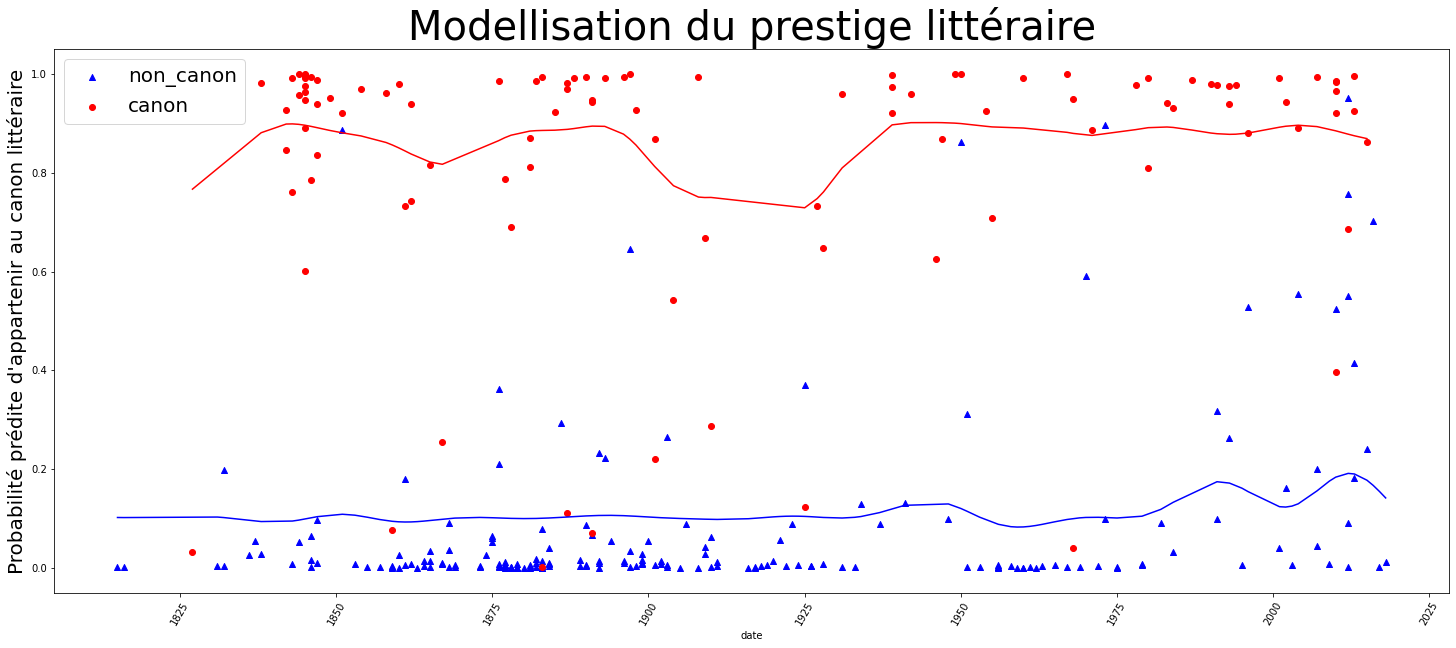

In [50]:
visualisation(df_fabula)

In [123]:
df_fabula['prediction'].value_counts()

False    189
True     107
Name: prediction, dtype: int64

In [86]:
df_fabula

,metadata,proba canon,proba non-canon,prediction,accord,date
index,,,,,,
1815_Gay-Sophie_Anatole_Vol-2,False,0.997322,0.002678,False,True,1815
1816_Bournon-Malarme-Charlotte-de_Lancelot-Montagu-ou-le-Resultat-des-bonnes-fortunes_Tome-1,False,0.997786,0.002214,False,True,1816
1827_Vigny-Alfred-de_Cinq-Mars,True,0.967936,0.032064,False,False,1827
1831_Signol-Alphonse-Macaire-Stanislas_Le-Chiffonnier_Tome-4,False,0.996499,0.003501,False,True,1831
1832_Karr-Alphonse_Sous-les-tilleuls,False,0.801398,0.198602,False,True,1832
...,...,...,...,...,...,...
2015_Germain-Sylvie_a-la-table-des-hommes,True,0.137837,0.862163,True,True,2015
2015_Sansal-Boualem_2084-La-fin-du-monde,False,0.758357,0.241643,False,True,2015
2016_Cusset-Catherine_L-autre-qu-on-adorait,False,0.298056,0.701944,True,False,2016
